In [7]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
from datetime import datetime

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [8]:
##
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')
df.head(2)

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268


In [9]:
## Datetime object
df["Quarter"] = pd.to_datetime(df["Quarter"])
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [10]:
##
fig = px.line(df, x = 'Quarter', y = 'Revenue', title = 'Amazon Revenue Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '3y', step = "year", stepmode = 'backward'),
             dict(count = 3, label = '5y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

In [14]:
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])
print("\nFeatures: \n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().any())
print("\nUnique values : \n", df.nunique())

Rows    :  61
Columns :  3

Features: 
 ['Quarter', 'Revenue', 'Net Income']

Missing Values:
 Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values : 
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [15]:
##
amazon_df = df.set_index("Quarter")

`Null hypothesis` - data is stationary <br>
`Alternate hypothesis` - data is not stationary

In [16]:
from statsmodels.tsa.stattools import kpss

In [17]:
tstest = kpss(amazon_df['Revenue'], 'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [18]:
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

p = 0.02995 which is less that 0.05 --> Null hypothesis is rejected hence data is not stationary

`Additive` : $y_{t} = T_{t} + C_{t} + S_{t} + I_{t}$ <br>
`Multiplicative` : $y_{t} = T_{t} \times C_{t} \times S_{t} \times I_{t}$

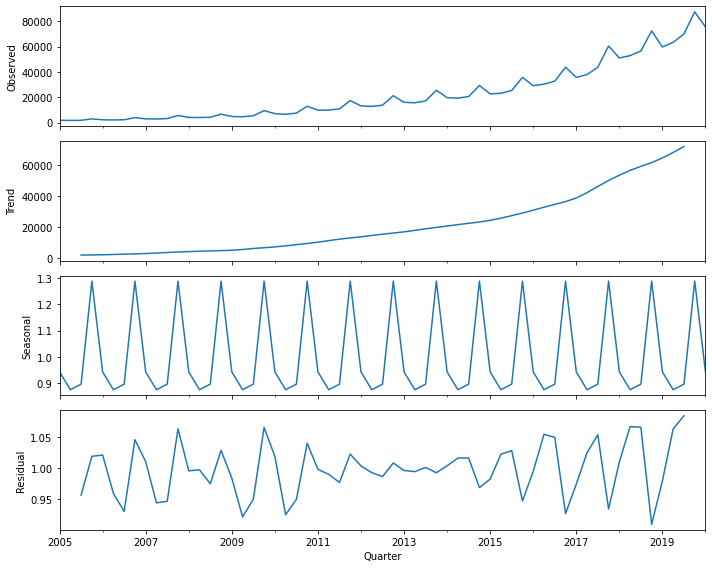

In [22]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'], model = 'multiplicative')
resplot =  res.plot()

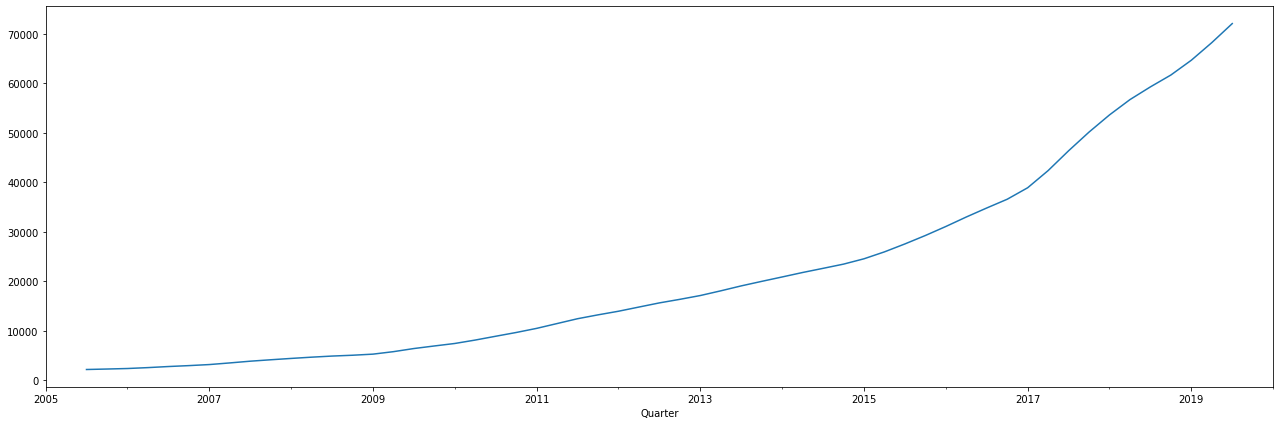

In [23]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [24]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [25]:
res.trend

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64

In [26]:
res.seasonal

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64

In [27]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64

In [28]:
## check
res.observed[2]

69981

In [29]:
res.trend[2] * res.seasonal[2] * res.resid[2]

69980.99999999999

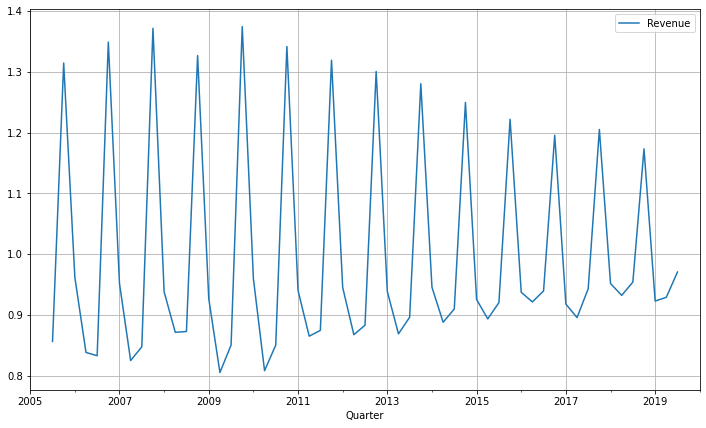

In [33]:
pd.DataFrame(res.observed/res.trend).plot(figsize=(12,7), grid=True);

Now, the simple ARIMA model can be used for analysis